# EDA of NHANES 2013-2014 database

## 0. Importing necessary modules

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 1. Importing CSV Files

In [4]:
demo = pd.read_csv("data/demographic.csv")
exam = pd.read_csv("data/examination.csv")
diet = pd.read_csv("data/diet.csv")
# medi = pd.read_csv("data/medications.csv")
ques = pd.read_csv("data/questionnaire.csv") 

In [5]:
display(demo.head())
display(exam.head())
display(diet.head())
display(ques.head())

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


# 2. Defining social groups based on income

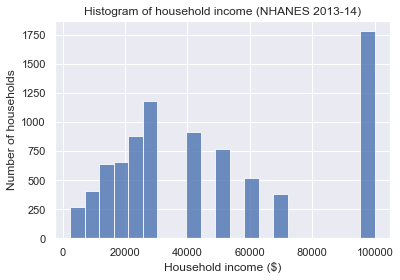

In [82]:
income_bins = demo[(demo["INDHHIN2"] <= 10) | (demo["INDHHIN2"] == 15)]["INDHHIN2"]

bin2bill = {1: 2500, 2: 7500, 3: 12500, 4: 17500, 5: 22500,
            6: 30000, 7: 40000, 8: 50000, 9: 60000, 10: 70000, 15: 100000}
income = income_bins.replace(bin2bill)
sns.distplot(income, kde=False, hist=True, hist_kws=dict(alpha=0.8))
plt.xlabel("Household income ($)")
plt.ylabel("Number of households")
plt.title("Histogram of household income (NHANES 2013-14)")
plt.savefig("simple_hist.png")

[Pew defines](https://www.pewsocialtrends.org/2015/12/09/the-american-middle-class-is-losing-ground/) the middle class as those earning between two-thirds and double the median household income. This Pew classification means that the category of middle-income is made up of people making somewhere between $\$40,500$ and $\$122,000$. 

```
income.median()
> 30000.0
```

Note that in this dataset, the median is at $\$30000$ (because the data is binned). Here for simplicity, we categorize into 3 categories as:
- Higher income: >=$\$65000$
- Middle income: $\$20000$~$65000$ 

- Lower income: <$\$20000$

We will call the categories as income-based SESs (`INCOSES`). 

# 3. Differences and disparities among income-based SESs
Our main objective is to find out whether social inequity leads to difference in health risk.

First, let us join the `demo` dataframe and `ques` dataframe.

In [78]:
dequ = demo.merge(ques)
dequ.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


We will put the categorized income status into a new column named `INCOBIN`.

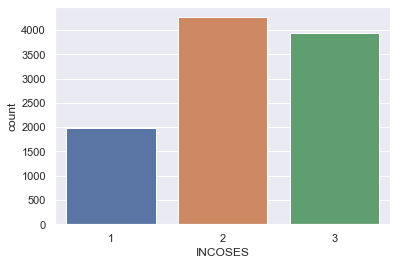

In [376]:
dequ["INCOSES"] = dequ["INDHHIN2"].apply(lambda x: 1 if x < 5 else(2 if x < 10 else 3))
sns.countplot(x="INCOSES", data=dequ)
plt.savefig("incoses.png")

Is there any significant difference of being overweight? Column `MCQ080` is the answer to the question: "Has a doctor or other health professional ever told {you/SP} that {you were/s/he/SP was} overweight?"

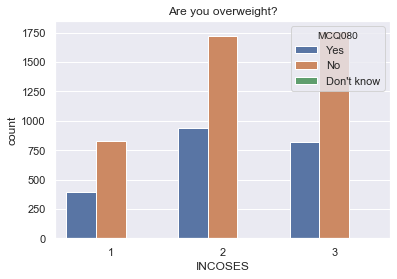

In [235]:
inco080 = dequ[["INCOSES", "MCQ080"]]
inco080.loc[:, "MCQ080"] = inco080.loc[:, "MCQ080"].replace({1.0: "Yes", 2.0: "No", 9.0: "Don't know"})
sns.countplot(x="INCOSES", hue="MCQ080", data=inco080)
plt.title("Are you overweight?")
plt.savefig("overw080.png")

In [234]:
inco080_pv = inco080.pivot_table(index="INCOSES", columns="MCQ080", aggfunc="size", fill_value=0)
inco080_pv.loc[:, "index"] = inco080_pv["Yes"] / sum(inco080_pv["Yes"], inco080_pv["No"])
inco080_pv

MCQ080,Don't know,No,Yes,index
INCOSES,,,,
1,0,824,395,0.132639
2,0,1722,940,0.242518
3,2,1762,819,0.209142


There is no any big significance between the income-based SESs. People tend to get overweight despite their income levels. Seems fair.

However, there is a interesting trend about how people try to reduce weight (to lower risk for certain diseases). The following graphs show the bar graph for the questions: 

1. Are you controlling or losing weight right now?
1. Are you now increasing exercise/physical activity?
1. Are you now reducing fat in diet?

<Figure size 576x576 with 0 Axes>

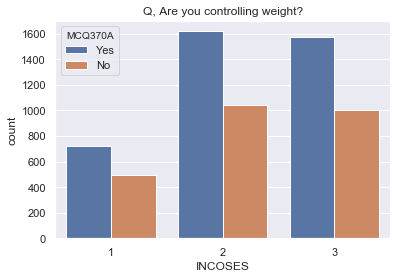

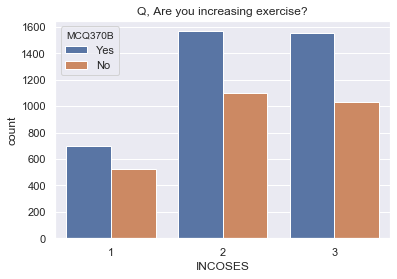

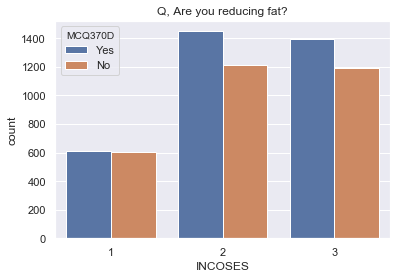

In [236]:
inco370a = dequ[["INCOSES", "MCQ370A"]]
inco370a.loc[:, "MCQ370A"] = inco370a.loc[:, "MCQ370A"].replace(
                                {1.0: "Yes", 2.0: "No", 7.0: "Refused", 9.0: "Don't know"})
inco370b = dequ[["INCOSES", "MCQ370B"]]
inco370b.loc[:, "MCQ370B"] = inco370b.loc[:, "MCQ370B"].replace(
                                {1.0: "Yes", 2.0: "No", 7.0: "Refused", 9.0: "Don't know"})
inco370d = dequ[["INCOSES", "MCQ370D"]]
inco370d.loc[:, "MCQ370D"] = inco370d.loc[:, "MCQ370D"].replace(
                                {1.0: "Yes", 2.0: "No", 7.0: "Refused", 9.0: "Don't know"})

plt.figure(figsize=(8, 8))
plt.figure(221)
sns.countplot(x="INCOSES", hue="MCQ370A", data=inco370a, hue_order=["Yes", "No"])
plt.title("Q, Are you controlling weight?")
plt.savefig("compare370a.png")
plt.figure(222)
sns.countplot(x="INCOSES", hue="MCQ370B", data=inco370b, hue_order=["Yes", "No"])
plt.title("Q, Are you increasing exercise?")
plt.figure(223)
sns.countplot(x="INCOSES", hue="MCQ370D", data=inco370d, hue_order=["Yes", "No"])
plt.title("Q, Are you reducing fat?")
plt.savefig("compare37d.png")

It is interesting to see that although the count distribution of the first two graphs are similar, the third one does not follow, especially in the lower income level. This may suggest the inequality of health education.

So, the questions we want to answer is, 
1. __Is there inequality aka difference in health education between income-based SESs?__
1. __Is there inequity aka difference in risk factors between income-based SESs?__

# 4. Is there a problem with health education?

To analyze this problem, we will choose some questions that might be related to health education and awareness. The questions are,

- DBQ223A: Drink whole/regular milk
- DBQ223E: Drink soy milk
- DBD381: # of times/week get school lunch
- DBD895: # of meals not home prepared
- DBD900: # of meals from fast food or pizza place
- CBQ535: Saw nutrition info on fast food menu
- CBQ580: Saw nutrition info on restaurant menu
- CBD070: Money spent at supermarket
- CBD120: Money spent on eating out
- FSD032C: Couldn't afford balanced meals
- MCQ300C: Close relative had diabetes
- WHD080A ~ WHD080T: Ate less to lose weight ~ Ate less junk food or fast food


In [378]:
import string
alph_list = list(string.ascii_uppercase)[0:11] + list(string.ascii_uppercase)[12:19]
q_list = ["DBQ223A", "DBQ223E", "DBD381", "DBD895", "DBD900", "CBQ535", "CBQ580", "CBD070", "CBD120",
          "FSD032C", "MCQ300C"] + ["WHD080" + alph for alph in alph_list] + ["INCOSES"]

incedu = dequ[q_list]
incedu

,DBQ223A,DBQ223E,DBD381,DBD895,DBD900,CBQ535,CBQ580,CBD070,CBD120,FSD032C,...,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,INCOSES
0,10.0,NaN,NaN,8.0,8.0,1.0,1.0,300.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,10.0,NaN,NaN,0.0,NaN,2.0,NaN,642.0,40.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,NaN,NaN,NaN,1.0,0.0,NaN,1.0,150.0,40.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,400.0,50.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,NaN,NaN,NaN,0.0,NaN,2.0,2.0,200.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,10.0,NaN,NaN,1.0,1.0,1.0,1.0,700.0,800.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
10171,NaN,NaN,NaN,2.0,1.0,NaN,NaN,440.0,120.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
10172,10.0,NaN,NaN,6.0,0.0,2.0,2.0,200.0,45.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
10173,NaN,NaN,5.0,0.0,NaN,NaN,NaN,200.0,30.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


Let's (for now) fill the Nans with zeros.

In [259]:
incedu = incedu.fillna(0)
incedu.head()

,DBQ223A,DBQ223E,DBD381,DBD895,DBD900,CBQ535,CBQ580,CBD070,CBD120,FSD032C,...,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,INCOSES
0,10.0,0.0,0.0,8.0,8.0,1.0,1.0,300.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,10.0,0.0,0.0,0.0,0.0,2.0,0.0,642.0,40.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,150.0,40.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,50.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,2.0,2.0,200.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


Can PCA increase the interpretability of this data? Since the dataframe is very sparse, we will use TruncatedSVD.

In [304]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA, TruncatedSVD

incedu_x = incedu.loc[:, :"WHD080S"]
incedu_x_normalized = normalize(incedu_x)

pca = PCA()
incedu_pca = pca.fit_transform(incedu_x_normalized)
incedu_pca = pd.DataFrame(incedu_pca)
incedu_pca.loc[:, "INCOSES"] = incedu["INCOSES"]

incedu_svd = TruncatedSVD().fit_transform(incedu_x)
incedu_svd = pd.DataFrame(incedu_svd)
incedu_svd.loc[:, "INCOSES"] = incedu["INCOSES"]

incedu_pca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,INCOSES
0,-0.307895,0.089255,-0.032151,0.004272,-0.011628,0.008318,-0.001163,-0.007697,0.004881,0.005122,...,-0.000540,-0.000231,-0.000173,0.000028,0.000120,0.000112,-0.000034,-0.000033,0.000154,1
1,-0.261933,0.039600,-0.022758,0.010751,0.011418,0.014497,-0.000962,-0.009563,0.007590,0.002237,...,-0.000418,-0.000243,0.000117,0.000037,0.000104,0.000181,-0.000042,-0.000018,0.000086,2
2,-0.092867,-0.057634,-0.021000,-0.008077,0.007300,-0.016655,-0.000762,0.004706,-0.005768,0.002575,...,-0.000099,0.000117,0.000156,-0.000721,-0.000033,0.000091,0.000011,-0.000211,0.000051,3
3,-0.211685,0.002444,-0.019522,-0.001699,0.014218,0.011560,-0.000807,-0.005953,0.004837,0.004282,...,-0.000395,-0.000116,0.000203,-0.000149,0.000073,0.000143,-0.000045,-0.000057,0.000065,2
4,-0.309991,0.077810,-0.023288,-0.002146,0.032074,0.012796,-0.000864,-0.010156,0.008940,0.001723,...,-0.001034,-0.000151,0.000251,0.000266,0.000146,0.000212,-0.000076,0.000036,0.000066,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,0.481616,-0.154883,-0.024630,0.006557,-0.005690,-0.007911,-0.000169,0.001386,-0.003804,-0.004940,...,0.000206,-0.000130,0.000067,-0.000986,-0.000407,-0.000169,0.000092,-0.000234,-0.000026,3
10171,-0.088354,-0.063864,-0.018939,-0.005752,-0.000046,-0.002255,-0.000835,0.000309,-0.001675,0.001493,...,0.000105,-0.000043,0.000187,-0.000614,-0.000027,0.000078,0.000006,-0.000181,0.000057,2
10172,-0.123439,-0.019747,-0.017016,0.015956,-0.035977,-0.030285,-0.003504,0.005771,0.008678,0.001804,...,0.001490,-0.002810,-0.005980,-0.003793,-0.000219,0.000237,0.000166,-0.000183,0.000095,2
10173,-0.190651,-0.007703,-0.020941,-0.002118,0.013982,0.015637,-0.000086,0.013899,-0.011404,0.002395,...,0.000091,-0.000076,0.000256,-0.000392,0.000050,0.000153,-0.000016,-0.000119,0.000054,2


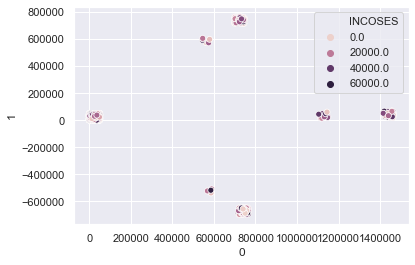

In [377]:
sns.scatterplot(x=0, y=1, hue="INCOSES", 
                data=incedu_svd + np.random.random(incedu_svd.shape) * 5e4)
plt.savefig("pca_tried.png")

Hmm, seems not.

Text(0.5, 1.0, '% of variability of data captured - # of PCs')

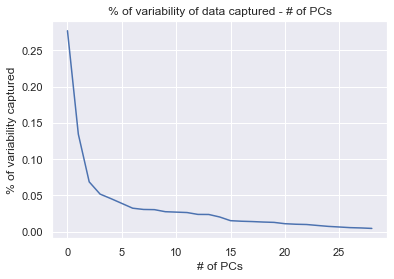

In [374]:
sns.lineplot(x=np.arange(0, 29), y=pca.singular_values_ / sum(pca.singular_values_))
plt.xlabel("# of PCs")
plt.ylabel("% of variability captured")
plt.title("% of variability of data captured - # of PCs")

Text(0.5, 1.0, '% of variability of data captured - # of PCs (cum. sum)')

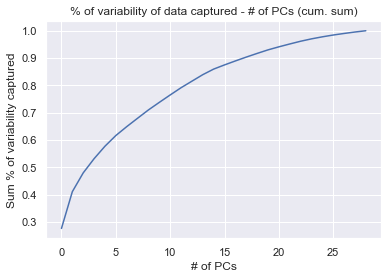

In [375]:
sns.lineplot(x=np.arange(0, 29), y=np.cumsum(pca.singular_values_ / sum(pca.singular_values_)))
plt.xlabel("# of PCs")
plt.ylabel("Sum % of variability captured")
plt.title("% of variability of data captured - # of PCs (cum. sum)")

So it seems that PCA does not work well in this case. We might as well use the original data.

Then, can we predict their income-based SESs from their answers?

In [403]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = incedu.loc[:, :"WHD080S"].fillna(0).values
y = incedu.loc[:, "INCOSES"].values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
X_train = normalize(X_train)
X_test = normalize(X_test)

best_score = 0
best_params = {}
for penalty in ["l1", "l2"]:
    for C in [0.01, 0.1, 1, 10, 100]:
        print("penalty: {} - C: {}".format(penalty, C))
        logreg = LogisticRegression(penalty="l1")
        logreg.fit(X_train, y_train)
        y_fit = logreg.predict(X_train)
        y_pred = logreg.predict(X_test)
        print("Training accuracy: {:.3f}".format(accuracy_score(y_fit, y_train)))
        print("Test accuracy: {:.3f}".format(accuracy_score(y_pred, y_test)))
        if accuracy_score(y_pred, y_test) > best_score:
            best_score = accuracy_score(y_pred, y_test)
            best_params["penalty"] = penalty
            best_params["C"] = C

print("Best params: {}".format(best_params))

penalty: l1 - C: 0.01


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training accuracy: 0.475
Test accuracy: 0.489
penalty: l1 - C: 0.1
Training accuracy: 0.475
Test accuracy: 0.489
penalty: l1 - C: 1


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training accuracy: 0.475
Test accuracy: 0.489
penalty: l1 - C: 10


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training accuracy: 0.475
Test accuracy: 0.489
penalty: l1 - C: 100


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training accuracy: 0.475
Test accuracy: 0.489
penalty: l2 - C: 0.01


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training accuracy: 0.475
Test accuracy: 0.489
penalty: l2 - C: 0.1


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training accuracy: 0.475
Test accuracy: 0.489
penalty: l2 - C: 1


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training accuracy: 0.475
Test accuracy: 0.489
penalty: l2 - C: 10


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training accuracy: 0.475
Test accuracy: 0.489
penalty: l2 - C: 100


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training accuracy: 0.475
Test accuracy: 0.489
Best params: {'penalty': 'l1', 'C': 0.01}


In [405]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_fit = clf.predict(X_train)
y_pred = clf.predict(X_train)
score = accuracy_score(y_fit, y_train)
test_score = accuracy_score(y_pred, y_train)

print(score, test_score)

0.9749385749385749 0.9749385749385749
